<a href="https://colab.research.google.com/github/juanes2855/KDD/blob/main/Parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PEC 1 20232**


Extensión de NumPy para manejar y  análizar datos, apoyandose en el concepto de dataframe

Integrantes:

             Julian Andres Masso Lopez
             John Fredy Muñoz Diaz
             Jhon Edison Vargas
             Juan Esteban Henao Ramírez

Descargue el siguiente dataset:
https://archive.ics.uci.edu/ml/datasets/adult

PEC: https://docs.google.com/document/d/1MNSCjdWmFve4rg5VcJfxC681Oi-zaDQa/edit?usp=sharing&ouid=110948318838625823280&rtpof=true&sd=true


Info:

Agregar una carpeta llamada *kdd* dentro de *sample_data* y dentro de kdd agregar todos los archivos descargados *No dentro de una carpeta* así:

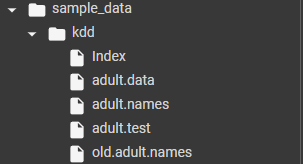

# **1. Complete el diccionario de datos (en tipo poner entero, real, binominal polinominal)**




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# se importa numpy
import numpy  as np
# libreria para graficar
import matplotlib.pyplot as plt
import seaborn as sns
pd.__version__
# si hay una versión antigua se actualiza
#!python -m pip install pandas==1.3.5

'1.5.3'

In [ ]:
#Lectura de archivo
df = pd.read_csv('/content/sample_data/kdd/adult.data')

#Cambio de nombre de encabezados
df.columns = [
'age',
'workclass'         ,
'fnlwgt' ,
'education'            ,
'education-num',
'marital-status'            ,
'occupation' ,
'relationship' ,
'race'         ,
'sex' ,
'capital-gain'           ,
'capital-loss'  ,
'hours-per-week'   ,
'native-country'    ,
'income'    ]

#print(df.isin([' ?']).sum(axis=0))
df['workclass'] = df['workclass'].replace(' ?', np.nan)
df['occupation'] = df['occupation'].replace(' ?', np.nan)
df['native-country'] = df['native-country'].replace(' ?', np.nan)


#Cambio de tipos de datos
df['education'] = df['education'].astype('category')
df['marital-status'] = df['marital-status'].astype('category')
df['workclass'] = df['workclass'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['sex'] = df['sex'].astype('category')
df['race'] = df['race'].astype('category')
df['native-country'] = df['native-country'].astype('category')
df['income'] = df['income'].astype('category')

#print (df.dtypes)
df.describe(include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32560.000000,30724,3.256000e+04,32560,32560.000000,32560,30717,32560,32560,32560,32560.000000,32560.000000,32560.000000,31977,32560
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [ ]:
df.mode()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **2. Identifique si hay columnas con más del 30% de valores faltantes.**

In [ ]:
for col in df.columns:
  if df[col].isna().sum() != 0:
    print(f"La columna {col} tiene {df[col].isna().sum()} valores vacíos.")
    print(f"Porcentaje faltante {round((df[col].isna().sum() / len(df[col]))*100 , 3)}%")

La columna workclass tiene 1836 valores vacíos.
Porcentaje faltante 5.639%
La columna occupation tiene 1843 valores vacíos.
Porcentaje faltante 5.66%
La columna native-country tiene 583 valores vacíos.
Porcentaje faltante 1.791%


Por lo tanto no hay columnas con mas del 30% de datos faltantes

In [ ]:
df.describe(include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32560.000000,30724,3.256000e+04,32560,32560.000000,32560,30717,32560,32560,32560,32560.000000,32560.000000,32560.000000,31977,32560
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


**Cambio de datos Nan**

In [ ]:
df.iloc[805]

age                                   50
workclass                            NaN
fnlwgt                             23780
education                        Masters
education-num                         14
marital-status     Married-spouse-absent
occupation                           NaN
relationship              Other-relative
race                               White
sex                                 Male
capital-gain                           0
capital-loss                           0
hours-per-week                        40
native-country             United-States
income                             <=50K
Name: 805, dtype: object

In [ ]:
df2 = df.copy()
df2['occupation'].fillna(df2['occupation'].mode()[0], inplace=True)
df2['workclass'].fillna(df2['workclass'].mode()[0], inplace=True)
df2['native-country'].fillna(df2['native-country'].mode()[0], inplace=True)
for col in df2.columns:
  if df2[col].isna().sum() != 0:
    print(f"La columna {col} tiene {df2[col].isna().sum()} valores vacíos.")
    print(f"Porcentaje faltante {round((df2[col].isna().sum() / len(df2[col]))*100 , 3)}%")

In [ ]:
df2.iloc[805]

age                                   50
workclass                        Private
fnlwgt                             23780
education                        Masters
education-num                         14
marital-status     Married-spouse-absent
occupation                Prof-specialty
relationship              Other-relative
race                               White
sex                                 Male
capital-gain                           0
capital-loss                           0
hours-per-week                        40
native-country             United-States
income                             <=50K
Name: 805, dtype: object

# **Adecuación de datos**

In [ ]:
df.mode()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2['workclass'].unique()

[' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov', ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked']
Categories (8, object): [' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc',
                         ' Self-emp-not-inc', ' State-gov', ' Without-pay']

In [ ]:
df2['workclass'] = df2['workclass'].map({' Self-emp-not-inc': 0,
                                            ' Self-emp-inc': 1,
                                            ' Local-gov': 2,
                                            ' State-gov': 3,
                                            ' Federal-gov': 4,
                                            ' Private': 5,
                                            ' Without-pay': 6,
                                            ' Never-worked': 7})
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,0,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,5,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,5,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,5,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,5,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df2['education'] = df2['education'].map({' Preschool': 0,
                                            ' 1st-4th': 1,
                                            ' 5th-6th': 2,
                                            ' 7th-8th': 3,
                                            ' 9th': 4,
                                            ' 10th': 5,
                                            ' 11th': 6,
                                            ' 12th': 7,
                                            ' HS-grad': 8,
                                            ' Some-college': 9,
                                            ' Assoc-acdm': 10,
                                            ' Assoc-voc': 11,
                                            ' Bachelors': 12,
                                            ' Masters': 13,
                                            ' Doctorate': 14,
                                            ' Prof-school': 15})
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,0,83311,12,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,5,215646,8,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,5,234721,6,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,5,338409,12,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,5,284582,13,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df2['marital-status'] = df2['marital-status'].map({' Never-married': 0,
                                                      ' Married-civ-spouse': 1,
                                                      ' Married-AF-spouse': 2,
                                                      ' Married-spouse-absent': 3,
                                                      ' Divorced': 4,
                                                      ' Separated': 5,
                                                      ' Widowed': 6})
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,0,83311,12,13,1,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,5,215646,8,9,4,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,5,234721,6,7,1,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,5,338409,12,13,1,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,5,284582,13,14,1,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df2['occupation'] = df2['occupation'].map({' Exec-managerial': 0,
                                              ' Handlers-cleaners': 1,
                                              ' Prof-specialty': 2,
                                              ' Other-service': 3,
                                              ' Adm-clerical': 4,
                                              ' Sales': 5,
                                              ' Transport-moving': 6,
                                              ' Farming-fishing': 7,
                                              ' Machine-op-inspct': 8,
                                              ' Tech-support': 9,
                                              ' Craft-repair': 10,
                                              ' Protective-serv': 11,
                                              ' Armed-Forces': 12,
                                              ' Priv-house-serv': 13})
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,0,83311,12,13,1,0,Husband,White,Male,0,0,13,United-States,<=50K
1,38,5,215646,8,9,4,1,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,5,234721,6,7,1,1,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,5,338409,12,13,1,2,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,5,284582,13,14,1,0,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df2['relationship'] = df2['relationship'].map({' Husband': 0,
                                                  ' Not-in-family': 1,
                                                  ' Wife': 2,
                                                  ' Own-child': 3,
                                                  ' Unmarried': 4,
                                                  ' Other-relative': 5})
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,0,83311,12,13,1,0,0,White,Male,0,0,13,United-States,<=50K
1,38,5,215646,8,9,4,1,1,White,Male,0,0,40,United-States,<=50K
2,53,5,234721,6,7,1,1,0,Black,Male,0,0,40,United-States,<=50K
3,28,5,338409,12,13,1,2,2,Black,Female,0,0,40,Cuba,<=50K
4,37,5,284582,13,14,1,0,2,White,Female,0,0,40,United-States,<=50K


In [ ]:
df2['race'] = df2['race'].map({' White': 0, ' Black': 1,
                                  ' Asian-Pac-Islander': 2,
                                  ' Amer-Indian-Eskimo': 3,
                                  ' Other': 4})
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,0,83311,12,13,1,0,0,0,Male,0,0,13,United-States,<=50K
1,38,5,215646,8,9,4,1,1,0,Male,0,0,40,United-States,<=50K
2,53,5,234721,6,7,1,1,0,1,Male,0,0,40,United-States,<=50K
3,28,5,338409,12,13,1,2,2,1,Female,0,0,40,Cuba,<=50K
4,37,5,284582,13,14,1,0,2,0,Female,0,0,40,United-States,<=50K


In [ ]:
df2['native-country'] = df2['native-country'].map({ ' United-States': 0,
                                            ' Cambodia': 1,
                                            ' England': 2,
                                            ' Puerto-Rico': 3,
                                            ' Canada': 4,
                                            ' Outlying-US(Guam-USVI-etc)': 5,
                                            ' India': 6,
                                            ' Japan': 7,
                                            ' Greece': 8,
                                            ' South': 9,
                                            ' China': 10,
                                            ' Cuba': 11,
                                            ' Iran': 12,
                                            ' Honduras': 13,
                                            ' Philippines': 14,
                                            ' Italy': 15,
                                            ' Poland': 16,
                                            ' Jamaica': 17,
                                            ' Vietnam': 18,
                                            ' Mexico': 19,
                                            ' Portugal': 20,
                                            ' Ireland': 21,
                                            ' France': 22,
                                            ' Dominican-Republic': 23,
                                            ' Laos': 24,
                                            ' Taiwan': 25,
                                            ' Haiti': 26,
                                            ' Columbia': 27,
                                            ' Hungary': 28,
                                            ' Guatemala': 29,
                                            ' Nicaragua': 30,
                                            ' Scotland': 31,
                                            ' Thailand': 32,
                                            ' Yugoslavia': 33,
                                            ' El-Salvador': 34,
                                            ' Trinadad&Tobago': 35,
                                            ' Peru': 36,
                                            ' Hong': 37,
                                            ' Germany': 38,
                                            ' Ecuador': 39,
                                            ' Holand-Netherlands': 40})
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,0,83311,12,13,1,0,0,0,Male,0,0,13,0,<=50K
1,38,5,215646,8,9,4,1,1,0,Male,0,0,40,0,<=50K
2,53,5,234721,6,7,1,1,0,1,Male,0,0,40,0,<=50K
3,28,5,338409,12,13,1,2,2,1,Female,0,0,40,11,<=50K
4,37,5,284582,13,14,1,0,2,0,Female,0,0,40,0,<=50K


In [ ]:
df2['sex'] = df2['sex'].map({' Male': 0, ' Female': 1})

In [ ]:
df2['income'] = df2['income'].map({' <=50K': 0, ' >50K': 1})

In [ ]:
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,0,83311,12,13,1,0,0,0,0,0,0,13,0,0
1,38,5,215646,8,9,4,1,1,0,0,0,0,40,0,0
2,53,5,234721,6,7,1,1,0,1,0,0,0,40,0,0
3,28,5,338409,12,13,1,2,2,1,1,0,0,40,11,0
4,37,5,284582,13,14,1,0,2,0,1,0,0,40,0,0


# **4. Construya un gráfico de cajas y bigotes para 2 variables numéricas, en relación con clase.  Concluya al respecto.**

          count       mean        std   min   25%   50%   75%   max
income                                                             
0       24719.0  36.783648  14.020365  17.0  25.0  34.0  46.0  90.0
1        7841.0  44.249841  10.519028  19.0  36.0  44.0  51.0  90.0


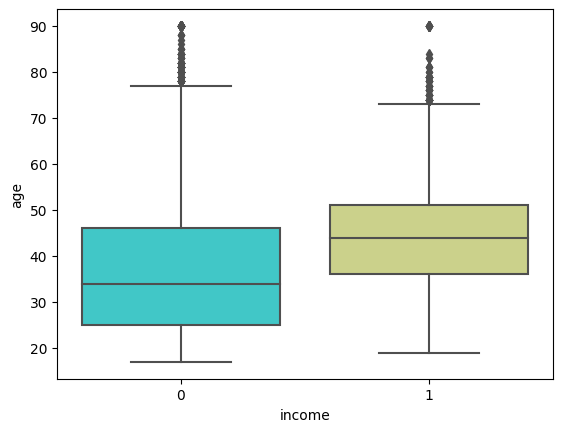

In [ ]:
sns.boxplot(x="income", y="age", data=df2,palette='rainbow');
# Crear un DataFrame con los datos de 'age' agrupados por 'income'
summary_df = df2.groupby('income')['age'].describe()

# Mostrar el resumen
print(summary_df)


Income 0: <=50k , 1: >50k

la mayoría de los ingresos <=50K se encuentran en el rango de edad entre 25 y 46, y se puede ver que los valores atipicos por encima del bigote aproximadamente de 78 años para arriba.
Por otro lado encontramos que los ingresos >50K se encuentran en el rango de edad entre 36 y 51, tambien podemos observar los valores atipicos por encima del bigote, aproximadamente desde los 75 años hacia arriba.

          count       mean        std  min   25%   50%   75%   max
income                                                            
0       24719.0  38.840163  12.319242  1.0  35.0  40.0  40.0  99.0
1        7841.0  45.473026  11.012971  1.0  40.0  40.0  50.0  99.0


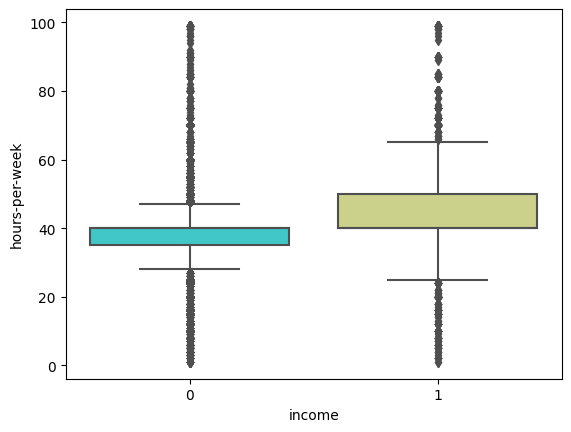

In [ ]:
sns.boxplot(x="income", y="hours-per-week", data=df2,palette='rainbow');
# Crear un DataFrame con los datos de 'age' agrupados por 'income'
summary_df = df2.groupby('income')['hours-per-week'].describe()

# Mostrar el resumen
print(summary_df)

Income 0: <=50k , 1: >50k

la mayoría de los ingresos <=50K se encuentran en el rango de horas por semana entre 35 y 40, y se puede ver que los valores atipicos por encima del bigote aproximadamente de 48 horas por semana para arriba, y por debajo del bigote inferior aproximadamente de 28 horas por semana para abajo. Por otro lado encontramos que los ingresos >50K se encuentran en el rango de horas por semana entre 40 y 50, tambien podemos observar los valores atipicos por encima del bigote superior aproximadamente desde los 65 horas hacia arriba; y para los valores atipicos inferiores se pueden observar aproximadamente de 25 horas hacia abajo.

# **5. Solucione los problemas referentes a calidad de datos presentes en al menos 6 variables, al menos dos de ellas deben ser categóricas. Elimine columnas irrelevantes. Identifique los datos atípicos reemplace esos valores por la media de cada clase o la moda, según corresponda. Debe agregar un párrafo, describiendo de manera ejecutiva, cuál fue el proceso seguido.**

Cambio de datos para la edad respecto a la clase

In [ ]:
dfcorr=df2.copy()
dfcorr['education'] = dfcorr['education'].astype('int64')
dfcorr['marital-status'] = dfcorr['marital-status'].astype('int64')
dfcorr['workclass'] = dfcorr['workclass'].astype('int64')
dfcorr['occupation'] = dfcorr['occupation'].astype('int64')
dfcorr['relationship'] = dfcorr['relationship'].astype('int64')
dfcorr['sex'] = dfcorr['sex'].astype('int64')
dfcorr['race'] = dfcorr['race'].astype('int64')
dfcorr['native-country'] = dfcorr['native-country'].astype('int64')
dfcorr['income'] = dfcorr['income'].astype('int64')

In [ ]:
# Importa plotly
import plotly.figure_factory as ff
# se comenta temporalmente
#df = df.drop('pasajeroId',axis=1)
# obtener los valores de la correlacion
correlation = dfcorr.corr().values.round(2)
# nombres de la columnas
names = list(dfcorr.corr().columns.values)
# se obtiene la transpuesta
transposed_corr = correlation[::-1]
ff.create_annotated_heatmap(transposed_corr, x = names,y = names[::-1], colorscale='plotly3')

**5.1** Eliminación de columna irrelevante fnlwgt




In [ ]:
df2 = df2.drop('fnlwgt', axis=1)

# Verifica que la columna 'fnlwgt' se haya eliminado
print(df2.head())

   age workclass education  education-num marital-status occupation  \
0   50         0        12             13              1          0   
1   38         5         8              9              4          1   
2   53         5         6              7              1          1   
3   28         5        12             13              1          2   
4   37         5        13             14              1          0   

  relationship race sex  capital-gain  capital-loss  hours-per-week  \
0            0    0   0             0             0              13   
1            1    0   0             0             0              40   
2            0    1   0             0             0              40   
3            2    1   1             0             0              40   
4            2    0   1             0             0              40   

  native-country income  
0              0      0  
1              0      0  
2              0      0  
3             11      0  
4              0

**El proceso seguido para eliminar la columna fnlwgt fue analizado la correlación que tenia con la demás columnas del dataset, aqui pudimos observar que la correlación más alta era de 0.09 siendo este valor muy bajo, por lo que consideramos que era una columna irrelevantes**

**5.2** Cambio de datos atipicos para la edad respecto a la clase

income
0    36.783648
1    44.249841
Name: age, dtype: float64
          count       mean        std   min   25%   50%   75%   max
income                                                             
0       24719.0  33.959068  10.198854  17.0  25.0  34.0  41.0  57.0
1        7841.0  43.422453   9.131094  24.0  37.0  44.0  50.0  64.0


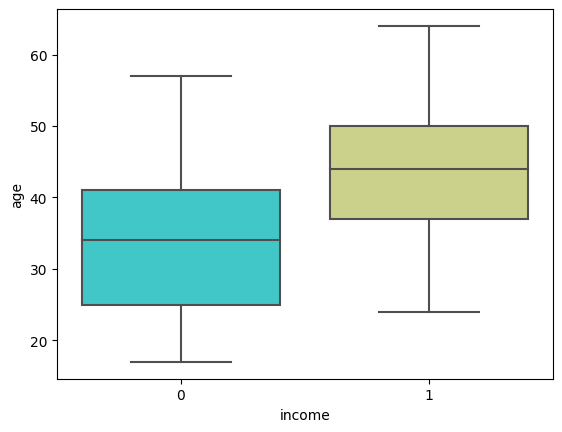

In [ ]:
df3=df2.copy()
mean_by_income = df3.groupby('income')['age'].mean()

print(mean_by_income)
# Crea una función para reemplazar los valores atípicos
def replace_outliers(row):
    income = row['income']
    age = row['age']
    mean_age = mean_by_income[income]

    if age < mean_age - 1.5 * df3['age'].std() or age > mean_age + 1.5 * df3['age'].std():
        return mean_age
    else:
        return age

# Aplica la función para reemplazar los valores atípicos
df3['age'] = df3.apply(replace_outliers, axis=1)

# Vuelve a trazar el gráfico de caja actualizado si es necesario
sns.boxplot(x="income", y="age", data=df3, palette='rainbow')
summary_df = df3.groupby('income')['age'].describe()
# Mostrar el resumen
print(summary_df)

**El proceso seguido para el cambio de datos atipicos de la edad respecto a la clase fue: realizar el diagrama de bigotes para observar los valores atipicos. Despues tomamos el DataFrame llamado `df2` y creamos una copia llamada `df3`. Luego, se calcula la media de la columna 'age' para diferentes niveles de ingresos ('income') y muestra estas medias. A continuación, se define una función llamada `replace_outliers` que reemplaza los valores atípicos en 'age' por la media correspondiente al nivel de ingresos. Los valores atípicos se identifican si están más allá de 1.5 veces la desviación estándar de la media. Después, esta función se aplica a cada fila de `df3`. Se genera un nuevo gráfico de caja para visualizar los cambios y se presenta un resumen estadístico de 'age' agrupado por nivel de ingresos.**

**5.3** Cambio de datos atipicos para education-num  respecto a la clase

          count       mean       std  min   25%   50%   75%   max
income                                                           
0       24719.0   9.594927  2.436100  1.0   9.0   9.0  10.0  16.0
1        7841.0  11.611657  2.385129  2.0  10.0  12.0  13.0  16.0


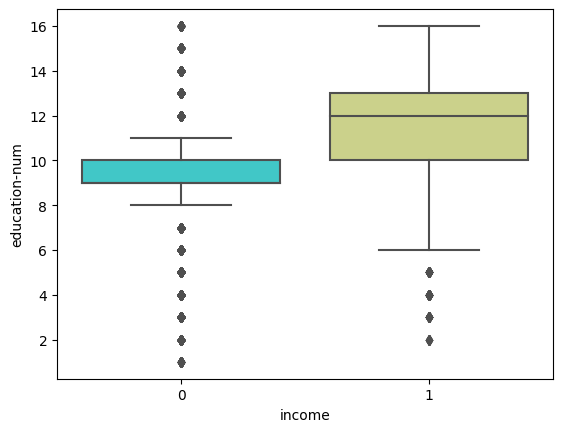

In [ ]:
df4=df3.copy()
sns.boxplot(x="income", y="education-num", data=df4, palette='rainbow')
summary_df = df4.groupby('income')['education-num'].describe()
# Mostrar el resumen
print(summary_df)

income
0     9.594927
1    11.611657
Name: education-num, dtype: float64
          count       mean       std  min   25%        50%   75%   max
income                                                                
0       24719.0   9.511482  0.530397  8.0   9.0   9.594927  10.0  11.0
1        7841.0  11.606584  1.963973  8.0  10.0  11.611657  13.0  15.0


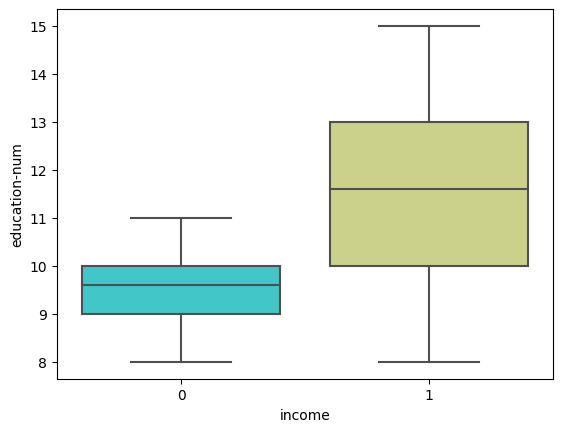

In [ ]:
df5=df4.copy()
mean_by_income = df5.groupby('income')['education-num'].mean()

print(mean_by_income)
# Crea una función para reemplazar los valores atípicos
def replace_outliers(row):
    income = row['income']
    education = row['education-num']
    mean_education = mean_by_income[income]

    if income == 0:
        min = 1
        max = 0.8
    else:
        min = 1.5
        max = 1.5

    if education < mean_education - min * df5['education-num'].std() or education > mean_education + max * df5['education-num'].std():
        return mean_education
    else:
        return education

# Aplica la función para reemplazar los valores atípicos
df5['education-num'] = df5.apply(replace_outliers, axis=1)

# Vuelve a trazar el gráfico de caja actualizado si es necesario
sns.boxplot(x="income", y="education-num", data=df5, palette='rainbow')
summary_df = df5.groupby('income')['education-num'].describe()
# Mostrar el resumen
print(summary_df)

**Este código trabaja con un DataFrame llamado `df4`, realiza una copia llamada `df5`, y luego calcula la media de la columna 'education-num' para diferentes niveles de ingresos ('income') y muestra estas medias. Luego, define una función llamada `replace_outliers` que se utiliza para reemplazar los valores atípicos en la columna 'education-num' por la media correspondiente al nivel de ingresos. La detección de valores atípicos se realiza considerando diferentes umbrales según el nivel de ingresos. La función se aplica a cada fila de `df5`. Después, se genera un nuevo gráfico de caja para visualizar los cambios y se presenta un resumen estadístico de 'education-num' agrupado por nivel de ingresos.**

**5.4** Binning de datos para Hours-per-week respecto a la clase

Text(0, 0.5, 'Proportion of population')

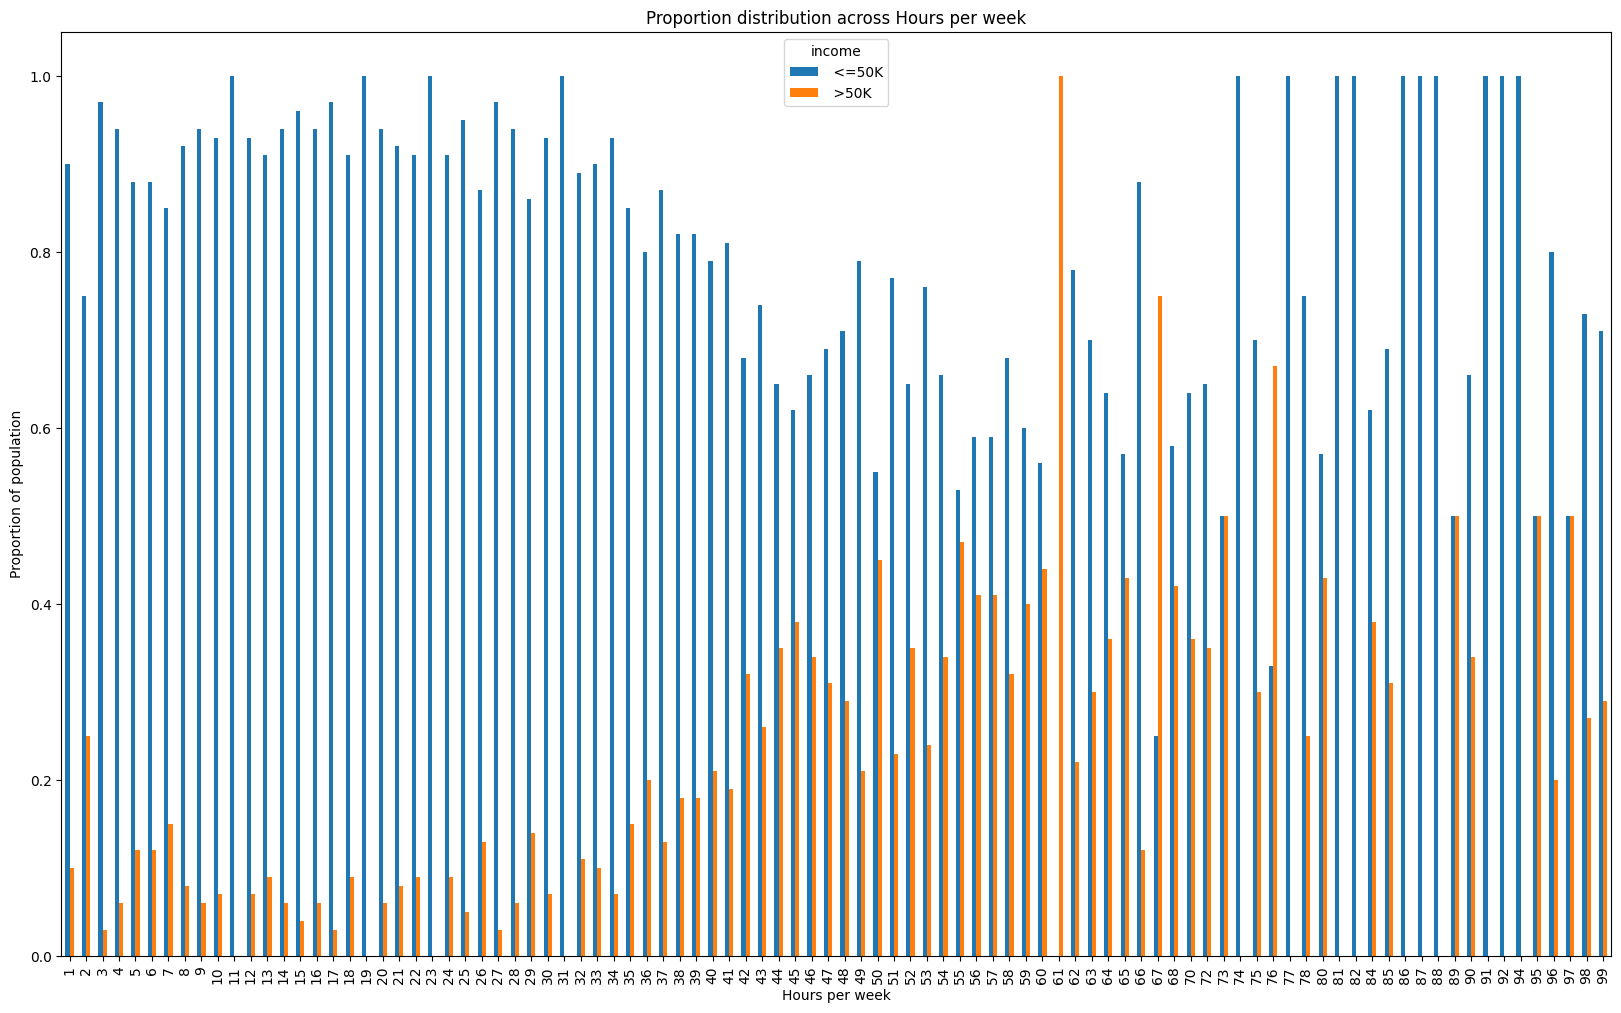

In [ ]:
hours_per_week = round(pd.crosstab(df['hours-per-week'], df.income).div(pd.crosstab(df['hours-per-week'], df.income).apply(sum,1),0),2)

ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (20,12))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')

Text(0, 0.5, 'Proporción de población')

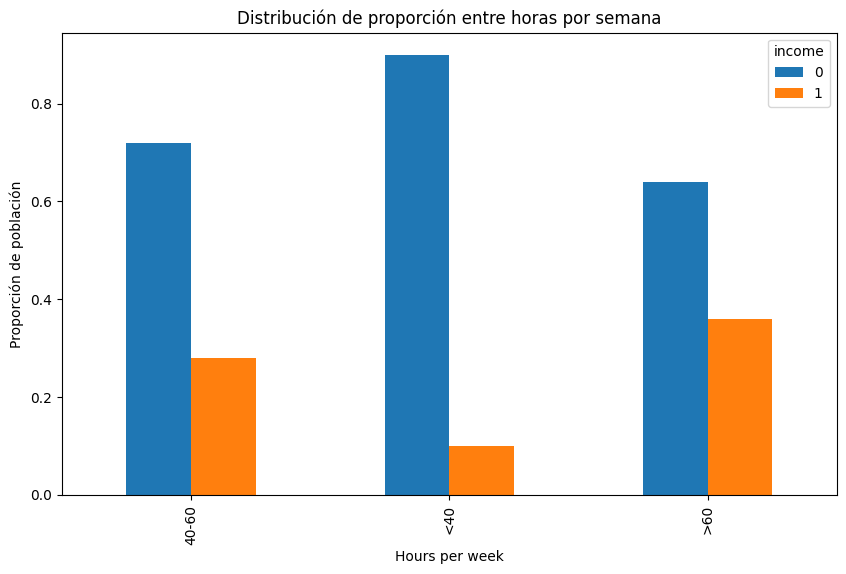

In [ ]:
df5['hour_worked_bins'] = ['<40' if i < 40 else '40-60' if i <= 60 else '>60'  for i in df5['hours-per-week']]
df5['hour_worked_bins'] = df5['hour_worked_bins'].astype('category')
hours_per_week = round(pd.crosstab(df5.hour_worked_bins, df5.income).div(pd.crosstab(df5.hour_worked_bins, df5.income).apply(sum,1),0),2)
ax = hours_per_week.plot(kind ='bar', title = 'Distribución de proporción entre horas por semana', figsize = (10,6))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proporción de población')


**Este código realiza dos gráficos de barras relacionados con las horas trabajadas por semana y su relación con los ingresos. En el primero, calcula y muestra la proporción de la población con diferentes niveles de ingresos en función de las horas trabajadas por semana pero como hay tanta distribución de los datos la calidad de los mismos para concluir información no es muy clara. En el segundo, agrupa las horas trabajadas en categorías ('<40', '40-60', '>60') y muestra la proporción de la población con diferentes niveles de ingresos para cada categoría. Ambos gráficos proporcionan una visión clara de cómo se distribuyen los ingresos en relación con las horas laborales semanales, permitiendo una fácil interpretación de estos patrones.**

**5.5** Cambio de datos poco comunes para la columna Education respecto a income

8     10501
9      7291
12     5354
13     1723
11     1382
6      1175
10     1067
5       933
3       646
15      576
4       514
7       433
14      413
2       333
1       168
0        51
Name: education, dtype: int64
8     32.251229
9     22.392506
12    16.443489
13     5.291769
11     4.244472
6      3.608722
10     3.277027
5      2.865479
3      1.984029
15     1.769042
4      1.578624
7      1.329853
14     1.268428
2      1.022727
1      0.515971
0      0.156634
Name: education, dtype: float64


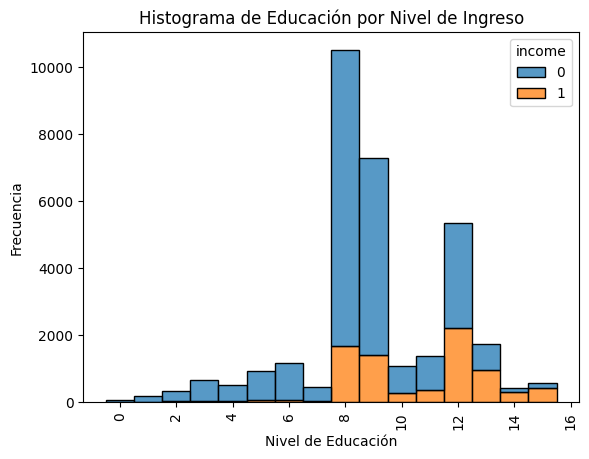

In [ ]:
# Crear un histograma
sns.histplot(data=df5, x='education', hue='income', multiple='stack')

# Personalizar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para que sean legibles
plt.xlabel('Nivel de Educación')
plt.ylabel('Frecuencia')
plt.title('Histograma de Educación por Nivel de Ingreso')
frecuencias_educacion = df5['education'].value_counts()
print(frecuencias_educacion)

frecuencias = df5['education'].value_counts()

# Calcular el porcentaje de ocurrencia para cada categoría
porcentaje_ocurrencia = (frecuencias / len(df5)) * 100

# Mostrar el resultado
print(porcentaje_ocurrencia)

8     14568
9      7291
12     5354
13     1723
11     1382
6      1175
10     1067
Name: education, dtype: int64


Text(0.5, 1.0, 'Histograma de Educación por Nivel de Ingreso')

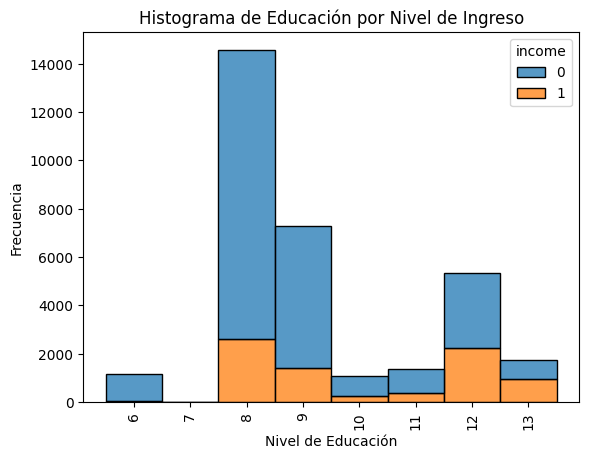

In [ ]:
df7 = df5.copy()
# Calcular la moda de la columna 'education'
moda_educacion = df7['education'].mode()[0]

# Reemplazar valores menos frecuentes por la moda
umbral = 1000  # Puedes ajustar este umbral según tus necesidades
valores_menos_frecuentes = df7['education'].value_counts()[df7['education'].value_counts() < umbral].index
df7['education'] = df7['education'].replace(valores_menos_frecuentes, moda_educacion)

# Obtener las frecuencias de las categorías actualizadas
frecuencias_educacion_actualizadas = df7['education'].value_counts()
print(frecuencias_educacion_actualizadas)


sns.histplot(data=df7, x='education', hue='income', multiple='stack')

# Personalizar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para que sean legibles
plt.xlabel('Nivel de Educación')
plt.ylabel('Frecuencia')
plt.title('Histograma de Educación por Nivel de Ingreso')

**Este código realiza varias tareas relacionadas con la columna 'education' en un conjunto de datos llamado 'df'. Primero, crea un histograma que muestra la distribución de la educación en función de los niveles de ingresos. Luego, personaliza el gráfico para que sea más legible. A continuación, calcula las frecuencias de cada categoría educativa y muestra esas frecuencias en la consola. Después, calcula y muestra el porcentaje de ocurrencia de cada categoría educativa en relación con el conjunto de datos completo. Finalmente, crea una copia del DataFrame original ('df7'), calcula la moda de la columna 'education', y reemplaza los valores menos frecuentes por la moda si su frecuencia es menor que el umbral establecido (en este caso, 1000 o menos del 3% de la frecuencia). Luego, muestra un nuevo histograma que refleja los cambios realizados en la columna 'education' después del reemplazo. Estas acciones ayudan a explorar y ajustar la columna 'education' para un análisis posterior.**

**5.6** Cambio de datos poco comunes de la columna workclass respecto a la clase

5    24532
0     2541
2     2093
3     1297
1     1116
4      960
6       14
7        7
Name: workclass, dtype: int64
5    75.343980
0     7.804054
2     6.428133
3     3.983415
1     3.427518
4     2.948403
6     0.042998
7     0.021499
Name: workclass, dtype: float64


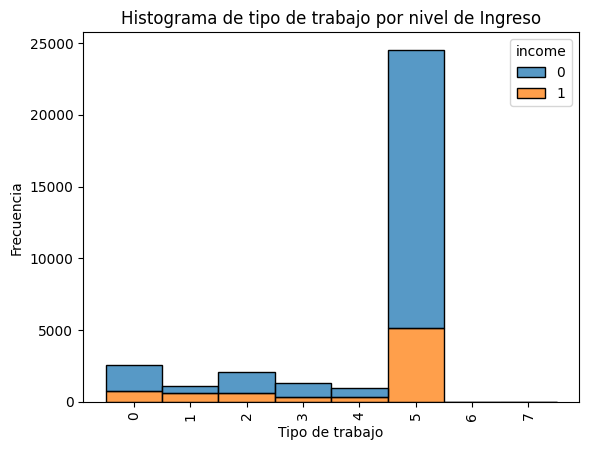

In [ ]:
# Crear un histograma
sns.histplot(data=df7, x='workclass', hue='income', multiple='stack')

# Personalizar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para que sean legibles
plt.xlabel('Tipo de trabajo')
plt.ylabel('Frecuencia')
plt.title('Histograma de tipo de trabajo por nivel de Ingreso')
frecuencias_trabajo = df7['workclass'].value_counts()
print(frecuencias_trabajo)

frecuencias = df7['workclass'].value_counts()

# Calcular el porcentaje de ocurrencia para cada categoría
porcentaje_ocurrencia = (frecuencias / len(df7)) * 100

# Mostrar el resultado
print(porcentaje_ocurrencia)

5    24553
0     2541
2     2093
3     1297
1     1116
4      960
Name: workclass, dtype: int64


Text(0.5, 1.0, 'Histograma de tipo de trabajo por nivel de Ingreso')

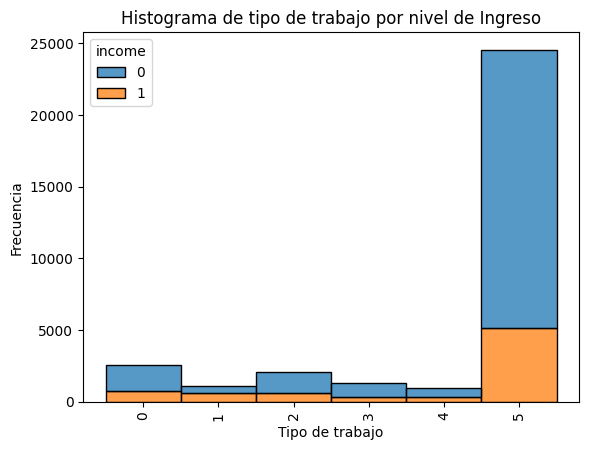

In [ ]:
# Calcular la moda de la columna 'education'
moda_tipo_trabajo = df7['workclass'].mode()[0]

# Reemplazar valores menos frecuentes por la moda
umbral = 100  # Puedes ajustar este umbral según tus necesidades
valores_menos_frecuentes = df7['workclass'].value_counts()[df7['workclass'].value_counts() < umbral].index
df7['workclass'] = df7['workclass'].replace(valores_menos_frecuentes, moda_tipo_trabajo)

# Obtener las frecuencias de las categorías actualizadas
frecuencias_tipo_trabajo_actualizadas = df7['workclass'].value_counts()
print(frecuencias_tipo_trabajo_actualizadas)


sns.histplot(data=df7, x='workclass', hue='income', multiple='stack')

# Personalizar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para que sean legibles
plt.xlabel('Tipo de trabajo')
plt.ylabel('Frecuencia')
plt.title('Histograma de tipo de trabajo por nivel de Ingreso')

**Este código crea y personaliza un histograma que representa la distribución de diferentes tipos de trabajo ('workclass') en función de los niveles de ingresos. Luego, calcula y muestra las frecuencias de cada categoría de trabajo en la columna 'workclass'. A continuación, se calcula y presenta el porcentaje de ocurrencia de cada categoría de trabajo en relación con el conjunto de datos completo. Además, se realiza un procesamiento adicional en un DataFrame modificado ('df7'), donde se calcula la moda del 'workclass' y se reemplazan los valores menos frecuentes por la moda si su frecuencia es menor que el umbral especificado (en este caso, 100). Por último, se muestra otro histograma que refleja los cambios realizados en la columna 'workclass' después del reemplazo. Estas acciones facilitan la exploración y el análisis de la columna 'workclass' en relación con los niveles de ingresos.**

# **6. Construya 8 gráficos (explore diferentes gráficos, que no todos vayan a ser iguales).  Debe concluir sobre cada uno. Nota: los gráficos deben permitir evidenciar algo, si no se puede concluir nada al respecto no son de utilidad (esto llevará tiempo). Sugerencia hacer uso de Excel para una exploración previa y usar correlación de Pearson.**

In [ ]:
df6=df7.copy()
df6['education'] = df6['education'].astype('int64')
df6['marital-status'] = df6['marital-status'].astype('int64')
df6['workclass'] = df6['workclass'].astype('int64')
df6['occupation'] = df6['occupation'].astype('int64')
df6['relationship'] = df6['relationship'].astype('int64')
df6['sex'] = df6['sex'].astype('int64')
df6['race'] = df6['race'].astype('int64')
df6['native-country'] = df6['native-country'].astype('int64')
df6['income'] = df6['income'].astype('int64')

In [ ]:

correlation = df6.corr().values.round(2)
# nombres de la columnas
names = list(df6.corr().columns.values)
# se obtiene la transpuesta
transposed_corr = correlation[::-1]
ff.create_annotated_heatmap(transposed_corr, x = names,y = names[::-1], colorscale='plotly3')

<ipython-input-36-23580da62937>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-36-23580da62937>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



**6.1**

Text(0, 0.5, 'Proporción de población')

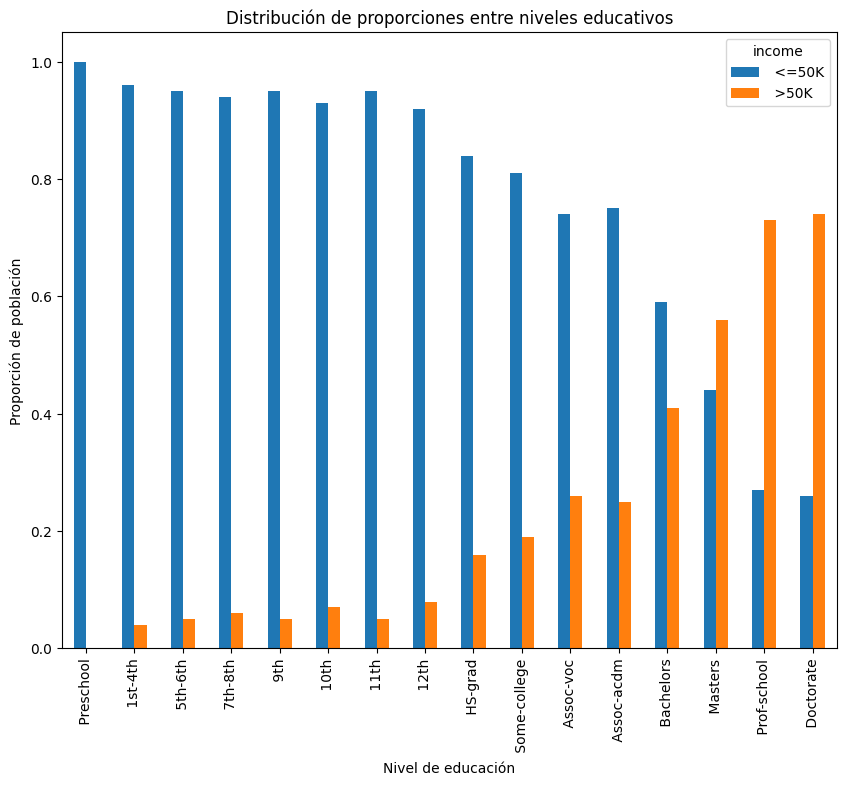

In [ ]:
edu_level = {}
for x,y in df[['education-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x


education = round(pd.crosstab(df.education, df.income).div(pd.crosstab(df.education, df.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind ='bar', title = 'Distribución de proporciones entre niveles educativos', figsize = (10,8))
ax.set_xlabel('Nivel de educación')
ax.set_ylabel('Proporción de población')

**Trazamos un gráfico de barras que muestra la proporción de clases de ingresos en todos los niveles educativos en la anterior figura. Vemos en el gráfico de barras a continuación que a medida que aumenta el nivel educativo, también aumenta la proporción de personas que ganan más de 50 mil al año. Es interesante observar que sólo después de una maestría, la proporción de personas que ganan más de 50 mil al año es mayoritaria.**

**6.2**

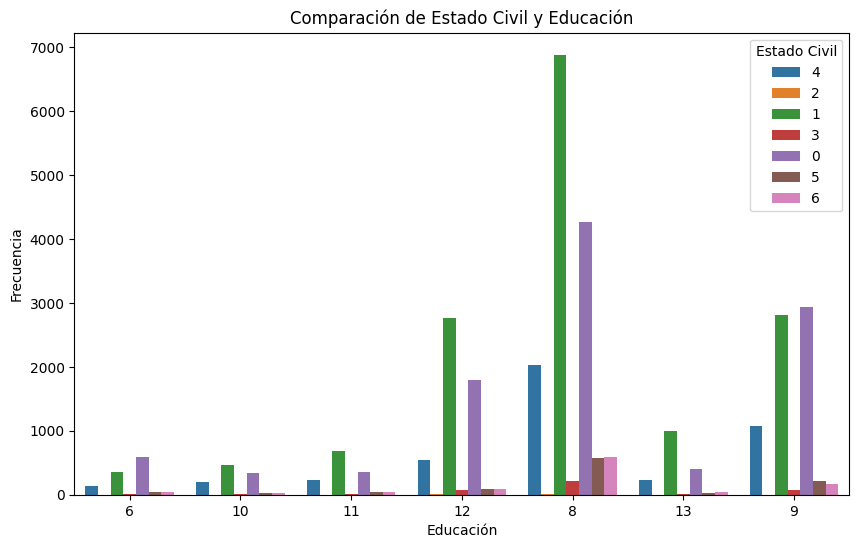

In [ ]:

# 6.2: Gráfico de barras agrupadas de dos columnas categóricas
plt.figure(figsize=(10, 6))
sns.countplot(data=df7, x='education', hue='marital-status')
plt.title('Comparación de Estado Civil y Educación')
plt.xlabel('Educación')
plt.ylabel('Frecuencia')
plt.legend(title='Estado Civil')
plt.show()



*Estado civil:*
' Never-married': 0,
' Married-civ-spouse': 1,
' Married-AF-spouse': 2,
' Married-spouse-absent': 3,
' Divorced': 4,
' Separated': 5,
' Widowed': 6

*Nivel de educación:*
' 11th': 6,
' HS-grad': 8,
' Some-college': 9,
' Assoc-acdm': 10,
' Assoc-voc': 11,
' Bachelors': 12,
' Masters': 13

**A partir de la gráfica encontramos que las personas que se encuentran casadas por lo civil son mas probable de tener niveles de educación mayores, a los demas estados civiles**

**6.3**

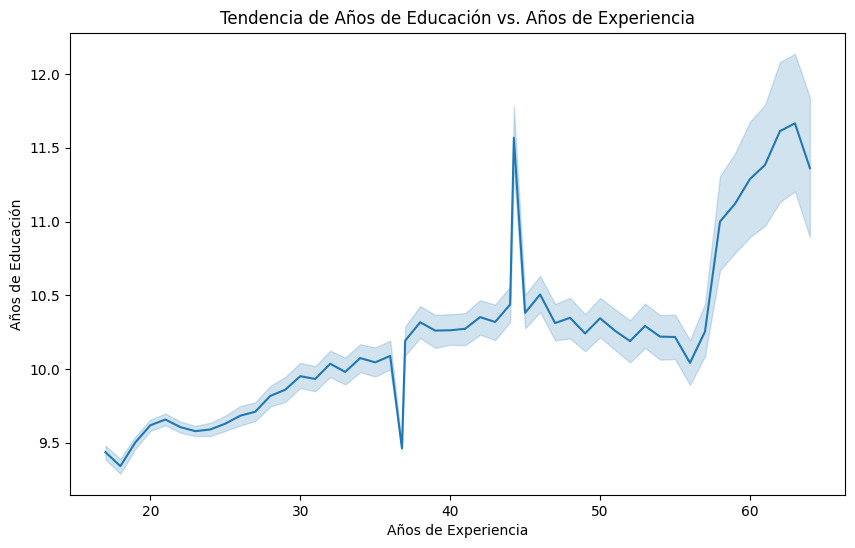

In [ ]:
# 6.3 Gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=df7, x='age', y='education-num')
plt.title('Tendencia de Años de Educación vs. Años de Experiencia')
plt.xlabel('Años de Experiencia')
plt.ylabel('Años de Educación')
plt.show()

**A partir del gráfico de líneas podemos observar que a medida que aumentan los años de experiencia tambien aumentan los años de educacion, lo que muestra un grado de interes de mejorar conocimientos para su vida laboral por parte de la poblacion del dataset**

**6.4**

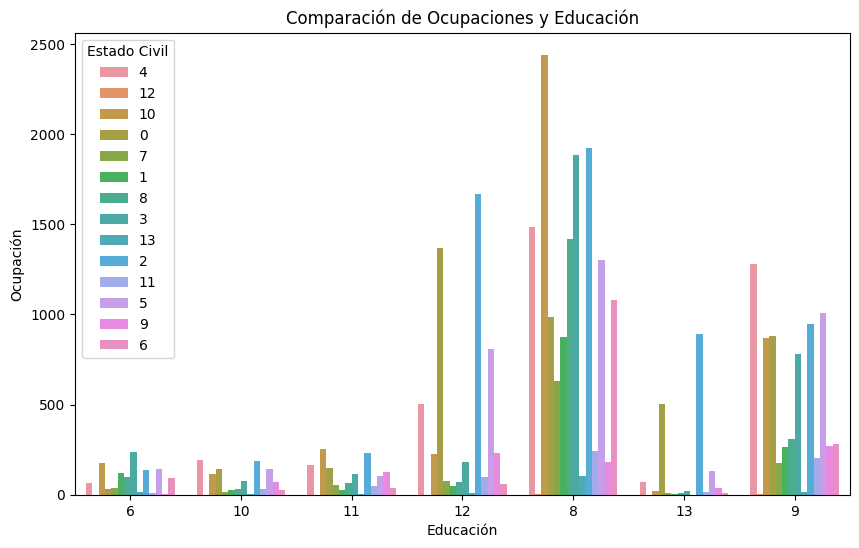

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df7, x='education', hue='occupation')
plt.title('Comparación de Ocupaciones y Educación')
plt.xlabel('Educación')
plt.ylabel('Ocupación')
plt.legend(title='Estado Civil')
plt.show()

**Nivel de educación:**
' 11th': 6,
' HS-grad': 8,
' Some-college': 9,
' Assoc-acdm': 10,
' Assoc-voc': 11,
' Bachelors': 12,
' Masters': 13

**Ocupaciones:**
' Exec-managerial': 0,
' Handlers-cleaners': 1,
' Prof-specialty': 2,
' Other-service': 3,
' Adm-clerical': 4,
' Sales': 5,

' Transport-moving': 6,
' Farming-fishing': 7,
' Machine-op-inspct': 8,
' Tech-support': 9,

' Craft-repair': 10,
                                          ' Protective-serv': 11,
                                          ' Armed-Forces': 12,
                                           ' Priv-house-serv': 13

**De este gráfico podemos concluir que a medida que las personas tiene mayor grado de educacion existe una relacion directa con la calidad de la ocupacion que desarrolla**

**6.5**

In [ ]:
#Gráfico de dispersión de tiras
import plotly.express as px
px.strip(df7, x="sex", y="age",
         color="income", stripmode='overlay')

**Sex: ' Male': 0, ' Female': 1
Income: ' <=50K': 0, ' >50K': 1**

**A partir de la gráfica podemos encontrar respecto a la relación que hay de edad  y genero respecto a la clase, que para los hombres a mayor edad es más probable que puedan contar con ingresos superiores a los 50k; mientras que la mujeres entre 30 y 50 años se pueden hacer foco a las gananacias superiores a los 50k y mientras más años tenga, más dificil será obtener estos ingresos.**

**6.6**

In [ ]:
def ponerNumerosBarra (ax):
  for bar in ax.patches:
        height = bar.get_height()
        width = bar.get_width()
        x = bar.get_x()
        y = bar.get_y()

        label_text = height
        label_x = x + width / 2
        label_y = y + height / 2


        ax.text(label_x, label_y, '{:,.1f}'.format(label_text), ha='center',
                va='center')

<ipython-input-43-1a7095cbee98>:1: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



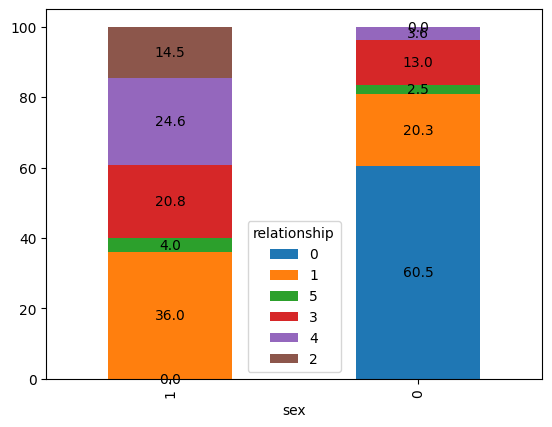

In [ ]:
ax=df7.groupby(['sex','relationship']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)
#Visitar https://matplotlib.org/3.2.1/gallery/ticks_and_spines/tick-formatters.html
ponerNumerosBarra(ax)

**Sex: ' Male': 0, ' Female': 1**
**' Husband': 0,
' Not-in-family': 1,
' Wife': 2,
' Own-child': 3,
' Unmarried': 4,
' Other-relative': 5**

**De la gráfica anterior se puede concluir que el porcentaje de personas casadas es mayor en los hombres con un 60,5% versus 14,5,% en las mujeres, además se puede observa que los hombres cuentan con mayor relación en familia**

**6.7**

In [ ]:
px.box(df7,x = 'sex',y='age', color='income', category_orders= {'sex': [ "Male", "Female"]})

# Nota: Pasar el cursor por cada caja para mas detalle
**Sex: ' Male': 0, ' Female': 1**
**Income: ' <=50K': 0, ' >50K': 1**

**Del gráfico anterior podemos concluir que las mujeres que ganan menos de 50k se encuentran en el rango de edad 24 y 41. Por otro lado tambien se evidenciamos el mismo comportamiento en los hombres en el rango de edad de 26 a 41 años.**

**6.8**

In [ ]:
px.strip(df7, x="race", y="hours-per-week",
         color="income", stripmode='overlay')

# Nota: Pasar el cursor por cada punto de la gráfica para mas detalle
**Race' White': 0,
' Black': 1,
' Asian-Pac-Islander': 2,
' Amer-Indian-Eskimo': 3,
' Other': 4**
**Income: ' <=50K': 0, ' >50K': 1**

Según el gráfico de dispersión por raza y horas por semana de trabajo respecto a la clase se puede determinar que la raza predominante de ingresos superiores a 50k es la 'White' esto tambien es acorde a  que es la que más horas trabaja.